In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
from datetime import datetime
filterwarnings("ignore")

In [3]:
df_train = pd.read_csv("./csv_files/train_users.csv")
df_test = pd.read_csv("./csv_files/test_users.csv")
education = pd.read_csv("./csv_files/education.csv")
skills = pd.read_csv("./csv_files/skills.csv")
languages = pd.read_csv("./csv_files/languages.csv")
work_experience = pd.read_csv("./csv_files/work_experiences.csv")
submission = pd.read_csv("./csv_files/submission.csv")

## <font color = "purple">Updating dataset with values which are belong the before 2019 year. </font>

In [4]:
work_experience = work_experience.loc[work_experience["start_year_month"].lt(201901)]

## <font color = "purple">Education Dataset </font>

In [5]:
education.head(2)

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,0,Anadolu Üniversitesi,NaN,NaN,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN,NaN,NaN


### <font color = "purple"> Data Preprocessing Steps </font>
- We can gather information about users' university degree, so we need to transform data to able to benefit from it.
- Therefore, we can count that how many degree/degrees are completed by per user by using <b><font color = "orange"> degree and user_id columns.</font></b>


In [6]:
education.isna().sum()

user_id                  0
school_name              0
degree               35842
fields_of_study      19838
start_year_month    134373
end_year_month      134985
dtype: int64

#### <font color = "red">->> Taking non-null values of degree and study colums, as we know that year columns have many missing values. They will be dropped after visualisation processes. </font>

In [7]:
education = education.loc[education["degree"].notnull() & education["fields_of_study"].notnull()]

#### <font color = "red">->> Creating  Dictionaries that contains similar verbs of certain degree types, to be able to clear or transform similar values, then locating the degree columns values and changing with them.</font>

In [8]:
fixed_degree = {
    "(?i).*(High School|Highschool|Lise|Lise Mezunu|Lisemezunu).*":"HighSchool",
    "(?i).*(Ön|Önlisan|Ön lisanas|Associate's degree|Associate).*":"Associate",
    "(?i).*(Lisans|bachelors|bachelor|BS|BS.c|Bsc|B.s|mezun|graduate|engineer|BA|Licence).*":"Bachelors",
    "(?i).*(yüksek|yüksek lisans|master|masters|Msc|MS|MS.c|Masters's degree|M.S).*" : "Masters",
    "(?i).*(Doktora|doctorate|phd|Ph.d).*" :"Doctorate"
}

fixed_university = {
    "(?i).*(Middle East Technical University|Orta Doğu Teknik Üniversitesi|ODTU|METU).*":"Tier1",
    "(?i).*(Hacettepe University|Hacettepe Üniversitesi).*":"Tier1",
    "(?i).*(Boğaziçi|Bogazici|Bogaziçi).*":"Tier1",
    "(?i).*(Ankara University|Ankara Üniversitesi).*":"Tier1",
    "(?i).*(Koç University|Koç Üniversitesi).*":"Tier1",
    "(?i).*(Bilkent University|Bilkent Üniversitesi).*":"Tier1",
    "(?i).*(Istanbul University|Istanbul Üniversitesi).*":"Tier1",
    "(?i).*(Atatürk Üniversitesi|Atatürk University).*":"Tier1",
    "(?i).*(Gazi University|Gazi Üniversitesi).*":"Tier1",
    "(?i).*(Ege University|Ege Üniversitesi).*":"Tier1",
    "(?i).*(Dokuz Eylül University|Dokuz Eylül Üniversitesi).*":"Tier1",
    "(?i).*(Sabanci University|Sabanci Üniveritesi).*":"Tier1",
    "(?i).*(Yildiz Technical University|Yıldız Teknik Üniversitesi|YTÜ).*":"Tier1",
    "(?i).*(University of Anatolia|Anadolu Üniversitesi).*":"Tier1",
    "(?i).*(Marmara University|Marmara Üniversitesi).*":"Tier1",
    "(?i).*(Firat University|Fırat Üniversitesi).*":"Tier1",
    "(?i).*(Istanbul Bilgi University|İstanbul Bilgi Üniversitesi).*":"Tier1",
    "(?i).*(Erciyes University|Erciyes Üniversitesi).*":"Tier1",
    "(?i).*(Sakarya University|Sakarya Üniversitesi).*":"Tier1",
    "(?i).*(Akdeniz University|Akdeniz Üniversitesi).*":"Tier1",
    "(?i).*(Ondokuz Mayis University|Ondokuz Mayıs Üniversitesi).*":"Tier1",
    "(?i).*(Uludağ|Uludag).*":"Tier1",
    "(?i).*(Karabük Üniversitesi:Karabük University).*":"Tier1",
    "(?i).*(Karadeniz Technical University|Karadeniz Teknik Üniversitesi).*":"Tier1",
    "(?i).*(Fırat University|Fırat Üniversitesi).*":"Tier1",
    "(?i).*(Istanbul Technical|İstanbul Teknik Üniversitesi|İstanbul Teknik).*":"Tier1",   
    "(?i).*(Bahçeşehir Üniversitesi|Bahcesehir University|BAU).*":"Tier2",
    "(?i).*(Çankaya University|Çankaya Üniversitesi|Cankaya University).*":"Tier2",
    "(?i).*(Gaziantep University|Gaziantep Üniversites).*":"Tier2",
    "(?i).*(Izmir Institute of Technology|İzmir Yüksek Teknoloji Enstitüsü).*":"Tier2",
    "(?i).*(Eskişehir Osmangazi University|Eskişehir Osmangazi  Üniversitesi).*":"Tier2",
    "(?i).*(Özyeğin University|Ozyegin University|Özyeğin Üniversitesi).*":"Tier2",
    "(?i).*(Cumhuriyet University|Sivas Cumhuriyet Üniversitesi|Cumhuriyet Üniversitesi).*":"Tier2",
    "(?i).*(Gebze Technological University|Gebze Teknik Üniversitesi).*":"Tier2",
    "(?i).*(Suleyman Demirel University|Süleyman Demirel Üniversitesi|Süleyman Demirel University|University of Suleyman Demirel).*":"Tier2",
    "(?i).*(Istanbul Aydin University|İstanbul Aydın Üniversitesi|Istanbul Aydın University).*":"Tier2",
    "(?i).*(TOBB Ekonomi ve Teknoloji Üniversitesi|TOBB University of Economics and Technology).*":"Tier2",
    "(?i).*(Mersin University|Mersin Üniversitesi).*":"Tier2",
    "(?i).*(Pamukkale University|Pamukkale Üniversitesi).*":"Tier2",
    "(?i).*(Kocaeli University|Kocaeli Üniversitesi).*":"Tier2",
    "(?i).*(Harran University|Harran Üniversitesi).*":"Tier2",
    "(?i).*(Yüzüncü Yil University|Yüzüncü Yil Üniversitesi|Yüzüncü Yıl Üniversitesi).*":"Tier2",
    "(?i).*(Trakya University|Trakya Üniversitesi).*":"Tier2",
    "(?i).*(Çanakkale Onsekiz Mart University|Çanakkale Onsekiz Mart Üniversitesi|Canakkale Onsekiz Mart University).*":"Tier2",
    "(?i).*(İnönü University Malatya|İnönü Üniversitesi|İnönü University).*":"Tier2",
    "(?i).*(Başkent University|Başkent Üniversitesi).*":"Tier2",
    "(?i).*(Düzce University|Düzce Üniversitesi).*":"Tier2",
    "(?i).*(Abant Izzet Baysal University|Abant Izzet Baysal Üniversitesi|Abant İzzet Baysal Üniversitesi).*":"Tier2",
    "(?i).*(Muğla Sıtkı Koçman University|Muğla Sıtkı Koçman Üniversitesi|Mugla Sitki Kocman University|Mugla University).*":"Tier2",
    "(?i).*(Gaziosmanpaşa University|Gaziosmanpaşa Üniversitesi|Gaziosmanpasa University).*":"Tier2",
    "(?i).*(Istanbul Medipol University|Istanbul Medipol Üniversitesi|İstanbul Medipol Üniversitesi).*":"Tier3",
    "(?i).*(Yeditepe University|Yeditepe Üniversitesi).*":"Tier3",
    "(?i).*(Gaziantep University|Gaziantep Üniversites).*":"Tier3",
    "(?i).*(Necmettin Erbakan Üniversitesi|Necmettin Erbakan University).*":"Tier3",
    "(?i).*(Çukurova University|Çukurova Üniversitesi|Cukurova University).*":"Tier3",
    "(?i).*(Kafkas University|Kafkas Üniversitesi).*":"Tier3",
    "(?i).*(Adnan Menderes University|Adnan Menderes Üniversitesi).*":"Tier3",
    "(?i).*(Atilim University|Atilim Üniversitesi|Atılım Üniversitesi|Atılım University).*":"Tier3",
    "(?i).*(Healh Sciences University Istanbul|Sağlık Bilimleri Üniversitesi).*":"Tier3",
    "(?i).*(Istanbul Aydin University|İstanbul Aydın Üniversitesi|Istanbul Aydın University).*":"Tier3",
    "(?i).*(İstanbul Medeniyet Üniversitesi|İstanbul Medeniyet University|Istanbul Medeniyet Üniversitesi|Istanbul Medeniyet University).*":"Tier3",
    "(?i).*(Afyon Kocatepe University|Afyon Kocatepe Üniversitesi).*":"Tier3",
    "(?i).*(Balikesir University|Balikesir Üniversitesi|Balıkesir University|Balıkesir Üniversitesi).*":"Tier3",     
    "(?i).*(Giresun University|Giresun Üniversitesi).*":"Tier3",
    "(?i).*(Zonguldak Bülent Ecevit University|Zonguldak Bülent Ecevit Üniversitesi|Zonguldak Bulent Ecevıt).*":"Tier3",
    "(?i).*(Selçuk University|Selçuk Üniversitesi|Selcuk Üniversitesi|Selcuk University).*":"Tier3",
    "(?i).*(Yaşar University|Yaşar Üniversitesi|Yasar University|Yasar Üniversitesi).*":"Tier3",
    "(?i).*(Bingöl University|Bingöl Üniversitesi).*":"Tier3",
    "(?i).*(Bozok University|Bozok Üniversitesi).*":"Tier3",
    "(?i).*(Gelişim University|Gelişim Üniversitesi|Gelisim University|Gelisim Üniversitesi).*":"Tier3",
    "(?i).*(Karamanoğlu Mehmetbey University|Karamanoglu Mehmetbey University|Karamanoğlu Mehmetbey Üniversitesi|Karamanoglu Mehmetbey Üniversitesi).*":"Tier3",
    "(?i).*(Kahramanmaraş Sütçü İmam University|Kahramanmaraş Sütçü İmam Üniversitesi|Kahramanmaras Sutcu İmam Üniversitesi).*":"Tier3",
    "(?i).*(Bartin University|Bartin Üniversitesi).*":"Tier3",
    "(?i).*(Izmir University of Economics|İzmir Ekonomi Üniversitesi).*":"Tier3",    
    "(?i).*(Kadir Has University|Kadir Has Üniversitesi).*":"Tier3",
    "(?i).*(Oxford|Kaliforniya|Harvard|Stanford|Cambridge|Massachusetts|Princeton|Kaliforniya| Berkeley|Yale|Chicago|Kolombiya|Imperial|Johns Hopkins|Pensilvanya|ETH Zürih|Pekin|Tsinghua|Toronto|Londra).*":"Tier_Unique"   
  
}


In [9]:
education.loc[:,"degree"] = education.loc[:,"degree"].replace(fixed_degree,regex=True)
education.loc[:,"school_name"] = education.loc[:,"school_name"].replace(fixed_university,regex=True)

In [10]:
education.loc[~education["degree"].isin(fixed_degree.values()),"degree"] = "Other" 

In [11]:
education = education[education["school_name"].isin(fixed_university.values())]

#### <font color = "red">->> Dropping duplicated values.  </font>

In [12]:
education.drop_duplicates(["degree","user_id"],inplace=True)

### <font color = "purple"> Visualisation Side </font>

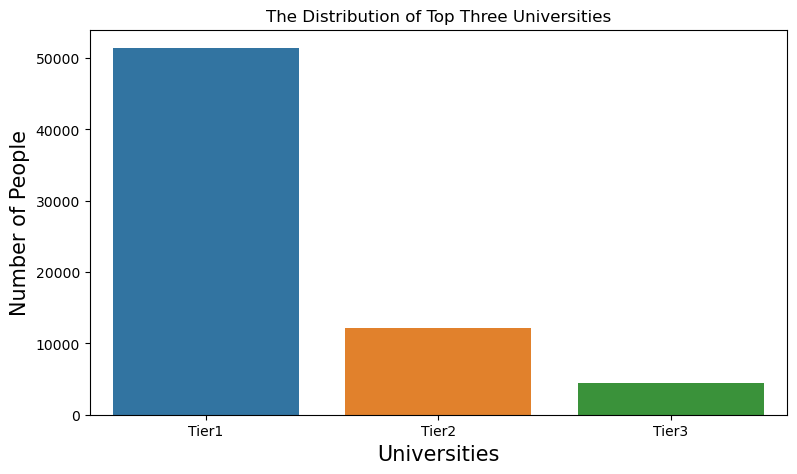

In [13]:
plt.figure(figsize=(9,5))
sns.barplot(x=education["school_name"].value_counts()[:3].index,y=education["school_name"].value_counts()[:3]);
plt.xlabel("Universities",fontsize=15)
plt.ylabel("Number of People",fontsize=15)
plt.title("The Distribution of Top Three Universities")
plt.show()

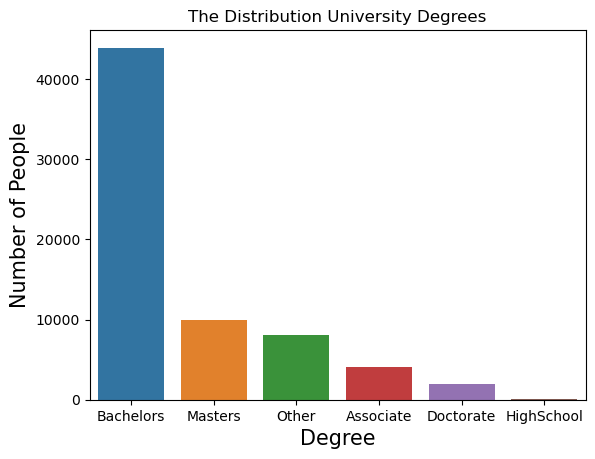

In [14]:
sns.barplot(x=education["degree"].value_counts().index,y=education["degree"].value_counts());
plt.xlabel("Degree",fontsize=15)
plt.ylabel("Number of People",fontsize=15)
plt.title("The Distribution University Degrees")
plt.show()

#### <font color = "red">->> Finalizing dataset by creating dummy variables to able to processed by machine learning side, and dropping unreleated columns.</font>

In [15]:
education = education.drop(columns=["fields_of_study","start_year_month","end_year_month"])


In [16]:
education = pd.get_dummies(education,drop_first=True)

In [17]:
education = education.groupby(by="user_id").sum()

In [18]:
education = education.astype("object")

In [19]:
education

,school_name_Tier2,school_name_Tier3,school_name_Tier_Unique,degree_Bachelors,degree_Doctorate,degree_HighSchool,degree_Masters,degree_Other
user_id,,,,,,,,
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
66269,0,0,0,1,0,0,0,0
66270,0,0,0,1,0,0,1,0
66271,0,0,0,1,1,0,1,0


## <font color = "purple">Skill Dataset </font>

### <font color = "purple"> Data Preprocessing Steps </font>
- In this dataset, we can take part of these skills to be able to process on machine learning side.
- Therefore, we can take first 30 values of skill column, and then will <b><font color = "orange">create dummy variables of them.</font></b>


In [20]:
values = list(skills["skill"].value_counts()[:10].index)

### <font color = "purple"> Visualisation Side </font>

In [21]:
temp_df = pd.DataFrame({"num_of_skills":skills["user_id"].value_counts()})

In [22]:
arr = []
unique_vals = temp_df["num_of_skills"].unique()
for val in unique_vals:
    arr.append(temp_df[temp_df["num_of_skills"]==val].count().values[0])
    

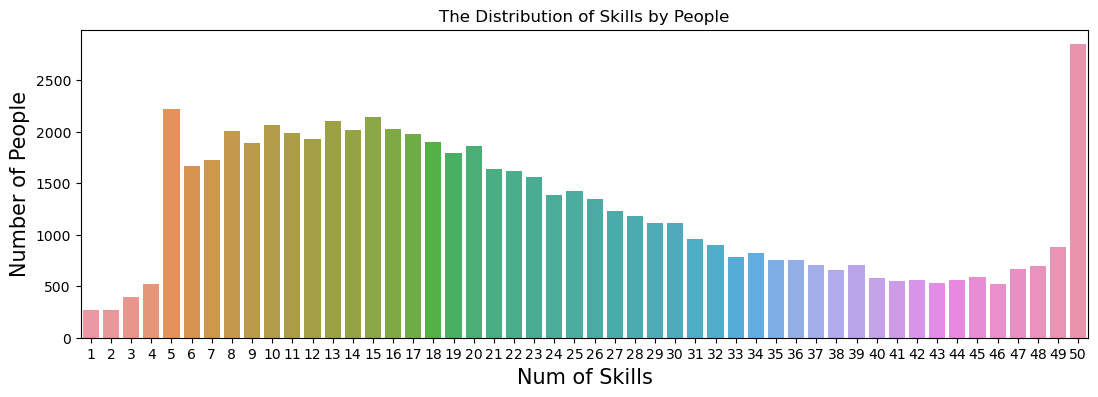

In [23]:
plt.figure(figsize=(13,4))
sns.barplot(x=unique_vals, y=arr);
plt.xlabel("Num of Skills",fontsize=15)
plt.ylabel("Number of People",fontsize=15)
plt.title("The Distribution of Skills by People")
plt.show()

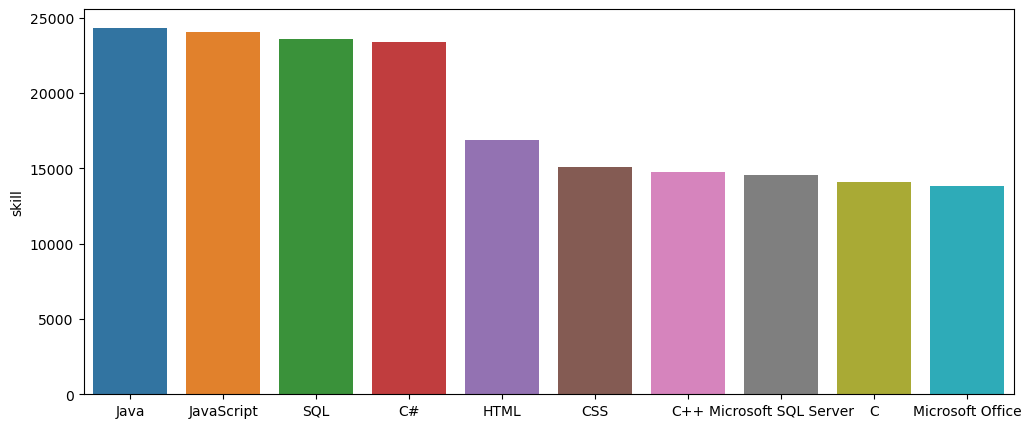

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(x=values,y=skills["skill"].value_counts()[:10]);

#### <font color = "red">->> Dropping duplicate values and updating dataset with selected skill values. </font>

In [25]:
used_skills = skills['skill'].value_counts().iloc[:60].index

skills = skills[skills['skill'].isin(used_skills)]
skills['experience'] = True

In [26]:
skills = skills.drop_duplicates(['user_id', 'skill'])
skills = pd.pivot(skills, index='user_id', columns='skill', values='experience')
skills = skills.fillna(0).astype(int)
skills = skills.drop(columns=["İngilizce"])
skills.head()

skill,.NET,AJAX,ASP.NET,ASP.NET MVC,Agile Methodologies,Android,AutoCAD,C,C#,C++,...,Software Engineering,Spring Framework,T-SQL,Visual Studio,Web Development,Web Geliştirme,Web Services,XML,Yazılım Geliştirme,jQuery
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color = "purple">Language Dataset </font>

#### <font color = "red">->> Dropping Na values  </font>

In [27]:
languages.dropna(inplace=True)

#### <font color = "red">->> Fixing some language values to gather them as a one value, and giving priorities or values to proficiency values for processing side. </font>


In [28]:
fixed_language_vals = {
    "(?i).*(English|ingilizce|ingizce|inglizce|ingilizce|İngilizice|ing|eng|en|Ingles).*":"English",
    "(?i).*(turkish|türkçe|Turk|türk|turkçe|türkçe|Turkish|Turkısh).*":"Turkish",
    "(?i).*(Almanca|Deutsch|Deutsch|Deutch|almanca|German|Germany).*":"German",
    "(?i).*(Francais|French|Fransız|Fransızca|Francais|Französisch|Français).*":"French",
    "(?i).*(Italian|Italyanca|Italiano|Italien|Napolitano).*":"Italian",
    "(?i).*(Spanish|Spani|Español|İspanyolca|Espańol).*" :"Spanish",
    "(?i).*(Rusça|Russian|Russe|Russain|Rusca).*" :"Russian",
    "(?i).*(Arabic|Arapça|Arapça|Arabish).*" :"Arabic",
    "(?i).*(Japanese|Japonca|japonca|Japonca).*" :"Japanese",
}

fixed_proficiency_vals = {
    'elementary': 1,
    'limited_working': 2,
    'professional_working': 3,
    'full_professional': 4,
    'native_or_bilingual': 5         
    
}



In [29]:
languages.loc[:, 'proficiency'].map(fixed_proficiency_vals)

0        4
1        5
2        1
4        5
5        3
        ..
76054    4
76058    3
76059    5
76060    3
76061    1
Name: proficiency, Length: 65401, dtype: int64

In [30]:
languages["language"] = languages["language"].replace(fixed_language_vals,regex=True)

In [31]:
languages["proficiency"] = languages["proficiency"].map(fixed_proficiency_vals)
languages

,user_id,language,proficiency
0,8,English,4
1,8,Turkish,5
2,8,French,1
4,11,Turkish,5
5,11,English,3
...,...,...,...
76054,66262,English,4
76058,66272,English,3
76059,66273,Turkish,5
76060,66273,English,3


In [32]:
languages=languages.loc[languages["language"].isin(fixed_language_vals.values())] 

In [33]:
languages["language"].value_counts()

English     31430
Turkish     19812
German       6684
Spanish      1671
Russian      1000
Arabic        816
French        751
Italian       667
Japanese      409
Name: language, dtype: int64

In [34]:
languages["proficiency"].value_counts()

5    21405
3    18109
4     8293
1     8174
2     7259
Name: proficiency, dtype: int64

### <font color = "purple">Visualisation Side</font>

#### <font color = "red">->> This graph shows us the distribution of Language Proficiencies. </font>

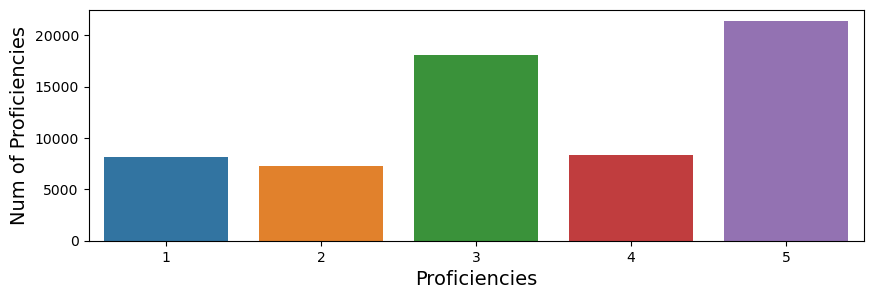

In [35]:
plt.figure(figsize=(10,3))
sns.barplot(x=languages["proficiency"].value_counts().index,y=languages["proficiency"].value_counts())
plt.xlabel("Proficiencies",fontsize=14)
plt.ylabel("Num of Proficiencies",fontsize=14)
plt.show()

#### <font color = "red">->> Dropping duplicated values. </font>

In [36]:
languages.drop_duplicates(["user_id","language"],inplace=True)

#### <font color = "red">->> Shows the distribution of certain languages as a pie chart. </font>

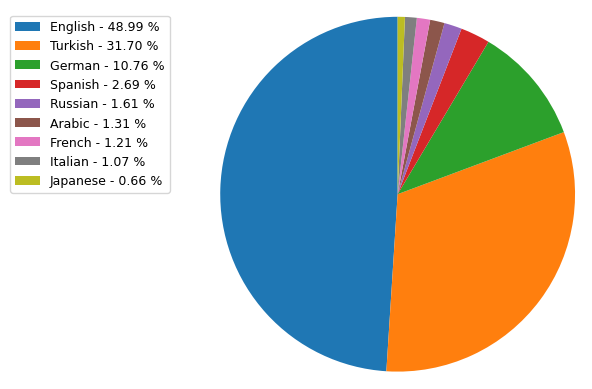

In [37]:
x = np.char.array(list(languages["language"].value_counts().index))
y = np.array(languages["language"].value_counts())
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=9)
plt.show()

#### <font color = "red">->> Finalizing dataset by grouping them with user_id, and filling na values with zero can be meant as unknown. </font>

In [38]:
languages = pd.pivot(languages,index="user_id",columns="language",values="proficiency")


In [39]:
languages.shape

(31017, 9)

In [40]:
languages.describe()

language,Arabic,English,French,German,Italian,Japanese,Russian,Spanish,Turkish
count,816.000000,30429.000000,751.000000,6681.000000,666.00000,409.000000,1000.000000,1671.000000,19693.000000
mean,2.856618,3.231128,1.663116,1.524921,1.39039,1.281174,1.812000,1.388989,4.927284
std,1.715403,0.768520,0.961782,0.824957,0.66321,0.802363,1.141911,0.643325,0.430166
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,5.000000
50%,2.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,5.000000
75%,5.000000,4.000000,2.000000,2.000000,2.00000,1.000000,2.000000,2.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000


In [41]:
languages.isna().sum()

language
Arabic      30201
English       588
French      30266
German      24336
Italian     30351
Japanese    30608
Russian     30017
Spanish     29346
Turkish     11324
dtype: int64

In [42]:
languages = languages.fillna(0)
languages = languages.astype("object")

## <font color = "purple">Work Experience Dataset</font>

#### <font color = "red">->> Dropping duplicate values</font>

In [43]:
work_experience = work_experience.drop_duplicates(["user_id","company_id"])

#### <font color = "red">->> Creating a temporary dataframe to be able to transfer, work experience datas which are grouped by user_id and taken by a specific year condition.</font>

In [44]:
work_experience = work_experience.sort_values(by=['user_id', 'start_year_month']) 

In [45]:
temp = pd.DataFrame()

temp["data_2000_and_after"] = work_experience[work_experience["start_year_month"].gt(200012)].groupby("user_id").size()
temp["data_2005_and_after"] = work_experience[work_experience["start_year_month"].gt(200512)].groupby("user_id").size()
temp["data_2010_and_after"] = work_experience[work_experience["start_year_month"].gt(201012)].groupby("user_id").size()
temp["data_2015_and_after"] = work_experience[work_experience["start_year_month"].gt(201512)].groupby("user_id").size()
temp["data_2016_and_after"] = work_experience[work_experience["start_year_month"].gt(201612)].groupby("user_id").size()
temp["data_2017_and_after"] = work_experience[work_experience["start_year_month"].gt(201712)].groupby("user_id").size()


temp["first_exp"] = work_experience.groupby("user_id")["company_id"].nth(-1).astype(str)
temp["second_exp"] = work_experience.groupby("user_id")["company_id"].nth(-2).astype(str)
temp["third_exp"] = work_experience.groupby("user_id")["company_id"].nth(-3).astype(str)
temp["fourth_exp"] = work_experience.groupby("user_id")["company_id"].nth(-4).astype(str)


temp["first_loc"] = work_experience.groupby("user_id")["location"].nth(-1).astype(str)
temp["second_loc"] = work_experience.groupby("user_id")["location"].nth(-2).astype(str)
temp["third_loc"] = work_experience.groupby("user_id")["location"].nth(-3).astype(str)
temp["fourth_loc"] = work_experience.groupby("user_id")["location"].nth(-4).astype(str)

temp["first_entrance"] = work_experience.groupby("user_id")["start_year_month"].min()
temp["last_entrance"] = work_experience.groupby("user_id")["start_year_month"].max()

date_arr = []


work_experience["start_year_month"] = work_experience["start_year_month"].astype(str)

  



In [46]:
for date_str in work_experience["start_year_month"]:

    date_object = datetime.strptime(date_str, '%Y%m').date()
    date_arr.append(date_object)
    
work_experience["dates"] = date_arr 
temp_date = work_experience.groupby("user_id")["dates"].max() - work_experience.groupby("user_id")["dates"].min()

In [47]:
temp_date = temp_date.astype('timedelta64[D]')
temp_date = (temp_date/365).map('{:,.1f}'.format)
temp_date = pd.DataFrame({"Years of experience":temp_date})
temp_date = temp_date.astype(float)
temp[temp_date.columns] = temp_date[temp_date.columns]

#### <font color = "red">->>This part was processed for only visualisation side, to create a lineplot which can be seen below.  </font>

In [48]:
work_experience["start_year_month"] = work_experience["start_year_month"].astype(dtype="str")
work_experience["start_year_month"] = (work_experience["start_year_month"].str[:4]).astype("int64")

#### <font color = "red">->> Shows a average experience distribution to years. </font>

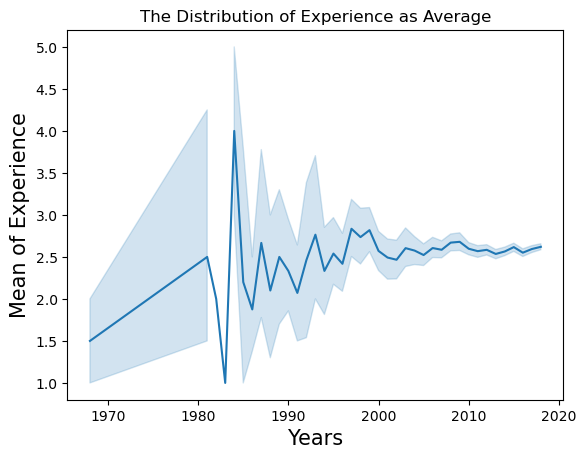

In [49]:
sns.lineplot(x=work_experience["start_year_month"],
             y=work_experience["user_id"].value_counts(),
            estimator="mean")
plt.title("The Distribution of Experience as Average")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Mean of Experience",fontsize=15)
plt.show();

#### <font color = "red">->> Dropping location and year columns because we don't use in machine learning side. </font>

In [50]:
work_experience.drop(columns=["location","start_year_month","company_id","dates"],inplace=True)

#### <font color = "red">->> Grouping them with user_id, concatting with temp column which contains number of experience in a certain time period. </font>

In [51]:
work_experience = work_experience.groupby(by="user_id").count()

In [52]:
work_experience = pd.concat([work_experience,temp],axis=1)

In [53]:
work_experience.describe(include="object").T

,count,unique,top,freq
first_exp,52596,10085,518,837
second_exp,36962,8589,740,476
third_exp,23020,5764,740,387
fourth_exp,12311,3546,740,172
first_loc,52596,2207,nan,16937
second_loc,36962,1980,nan,12072
third_loc,23020,1424,nan,7697
fourth_loc,12311,873,nan,4060


In [54]:
work_experience.describe().T

,count,mean,std,min,25%,50%,75%,max
data_2000_and_after,52596.0,2.555898,1.582961,1.0,1.0,2.0,3.0,23.0
data_2005_and_after,51941.0,2.497199,1.536520,1.0,1.0,2.0,3.0,23.0
data_2010_and_after,49467.0,2.275153,1.369315,1.0,1.0,2.0,3.0,17.0
data_2015_and_after,38154.0,1.619542,0.883887,1.0,1.0,1.0,2.0,13.0
data_2016_and_after,32317.0,1.415045,0.697945,1.0,1.0,1.0,2.0,7.0
data_2017_and_after,21275.0,1.184912,0.460561,1.0,1.0,1.0,1.0,5.0
first_entrance,52596.0,201262.051316,482.072887,196103.0,201007.0,201403.0,201609.0,201812.0
last_entrance,52596.0,201607.460757,283.120000,200101.0,201509.0,201707.0,201806.0,201812.0
Years of experience,52596.0,3.478964,4.184683,0.0,0.0,2.2,5.3,50.4


#### <font color = "red">->> Creating some columns which contains some experiences, locations, years of experience  </font>

In [55]:
work_experience["data_2000_and_after"]= work_experience["data_2000_and_after"].fillna(work_experience["data_2000_and_after"].mean())
work_experience["data_2005_and_after"]= work_experience["data_2005_and_after"].fillna(work_experience["data_2005_and_after"].mean())
work_experience["data_2010_and_after"]= work_experience["data_2010_and_after"].fillna(work_experience["data_2010_and_after"].mean())

work_experience["data_2015_and_after"]= work_experience["data_2015_and_after"].fillna(work_experience["data_2015_and_after"].median())
work_experience["data_2016_and_after"]= work_experience["data_2016_and_after"].fillna(work_experience["data_2016_and_after"].median())
work_experience["data_2017_and_after"]= work_experience["data_2017_and_after"].fillna(work_experience["data_2017_and_after"].median())

frequent_value_first = int(work_experience["first_exp"].fillna(work_experience["first_exp"]).describe()[2])
frequent_value_second = int(work_experience["second_exp"].fillna(work_experience["second_exp"]).describe()[2])
frequent_value_third = int(work_experience["third_exp"].fillna(work_experience["third_exp"]).describe()[2])
frequent_value_fourth = int(work_experience["fourth_exp"].fillna(work_experience["fourth_exp"]).describe()[2])

work_experience["first_exp"]= work_experience["first_exp"].fillna(frequent_value_first)
work_experience["second_exp"]= work_experience["second_exp"].fillna(frequent_value_second)
work_experience["third_exp"]= work_experience["third_exp"].fillna(frequent_value_third)
work_experience["fourth_exp"]= work_experience["fourth_exp"].fillna(frequent_value_fourth)


work_experience["first_loc"] = work_experience["first_loc"].replace("nan","Istanbul")
work_experience["first_loc"]= work_experience["first_loc"].fillna("Istanbul")

work_experience["second_loc"] = work_experience["second_loc"].replace("nan","Istanbul, Turkey")
work_experience["second_loc"]= work_experience["second_loc"].fillna("Istanbul, Turkey")

work_experience["third_loc"] = work_experience["third_loc"].replace("nan","Istanbul, Turkey")
work_experience["third_loc"]= work_experience["third_loc"].fillna("Istanbul, Turkey")

work_experience["fourth_loc"] = work_experience["fourth_loc"].replace("nan","Istanbul, Turkey")
work_experience["fourth_loc"]= work_experience["fourth_loc"].fillna("Istanbul, Turkey")


work_experience["Years of experience"]= work_experience["Years of experience"].fillna(work_experience["Years of experience"].mean())


## <font color = "purple">All Datasets </font>

In [56]:
df_train.head()

,user_id,industry,location,moved_after_2019
0,1301,Information Technology and Services,"Istanbul, Istanbul, Turkey",1
1,6950,Internet,"Istanbul, Istanbul, Turkey",0
2,4880,Online Media,Turkey,0
3,26046,Telecommunications,"Istanbul, Istanbul, Turkey",0
4,11005,Banking,"Istanbul, Turkey",0


#### <font color = "red">->> Fixing some values of train and test dataset  </font>

In [57]:
abroad_countries = df_train[~df_train["location"].str.contains("Turkey|Greater",na=False)]["location"].unique()
df_train.loc[df_train["location"].isin(abroad_countries),"location"]= "abroad_countries"

In [58]:
df_train.loc[df_train["location"].str.contains("Istanbul|İstanbul",na=False),"location"] = "Istanbul"
df_train.loc[df_train["location"].str.contains("Ankara",na=False),"location"] = "Ankara"
df_train.loc[df_train["location"].str.contains("Kocaeli",na=False),"location"] = "Kocaeli"
df_train.loc[df_train["location"].str.contains("İzmir|Izmir",na=False),"location"] = "İzmir"
df_train.loc[df_train["location"].str.contains("Mersin|İçel",na=False),"location"] = "Mersin"
df_train.loc[df_train["location"].str.contains("Sakarya",na=False),"location"] = "Sakarya"
df_train.loc[df_train["location"].str.contains("Konya",na=False),"location"] = "Konya"

In [59]:
abroad_countries = df_test[~df_test["location"].str.contains("Turkey|Greater",na=False)]["location"].unique()
df_test.loc[df_test["location"].isin(abroad_countries),"location"]= "abroad_countries"

In [60]:
df_test.loc[df_test["location"].str.contains("Istanbul|İstanbul",na=False),"location"] = "Istanbul"
df_test.loc[df_test["location"].str.contains("Ankara",na=False),"location"] = "Ankara"
df_test.loc[df_test["location"].str.contains("Kocaeli",na=False),"location"] = "Kocaeli"
df_test.loc[df_test["location"].str.contains("İzmir|Izmir",na=False),"location"] = "İzmir"
df_test.loc[df_test["location"].str.contains("Mersin|İçel",na=False),"location"] = "Mersin"
df_test.loc[df_test["location"].str.contains("Sakarya",na=False),"location"] = "Sakarya"
df_test.loc[df_test["location"].str.contains("Konya",na=False),"location"] = "Konya"

In [61]:
df_train["location"].value_counts()[:5]

Istanbul    28391
Turkey      10922
Ankara       7708
İzmir        1955
Kocaeli       557
Name: location, dtype: int64

In [62]:
df_test["location"].value_counts()[:5]

Istanbul    7081
Turkey      2732
Ankara      1948
İzmir        485
Kocaeli      134
Name: location, dtype: int64

In [63]:
fixed_industry = {
    "Computer Software|Computer Games|Mobile Games":"Computer Software",
    "Information Technology and Services|Telecommunications|Internet|Computer & Network Security|Computer Networking|Information Services":"Information Services",
    "Defense & Space|Automotive|Electrical/Electronic Manufacturing|Aviation & Aerospace|Industrial Automation|Retail|Airlines/Aviation|Mechanical or Industrial Engineering|Consumer Electronics|Textiles|Chemicals|Machinery|Construction|Mining & Metals|Oil & Energy|Consumer Goods|Food & Beverages":"Industrial and Manufacturing",
    "Pharmaceuticals|Hospital & Health Care|Medical Devices":"Health",
    "Banking|Higher Education|Financial Services|Program Development|Research|Insurance|Nonprofit Organization Management|Education Management|Marketing and Advertising|E-Learning":"Business/Education"    
}

In [64]:
df_train.loc[:"industry"] = df_train.loc[:"industry"].replace(fixed_industry,regex=True)
df_train.loc[~df_train["industry"].isin(fixed_industry.values()),"industry"]= "Other_Sectors" 

In [65]:
df_test.loc[:"industry"] = df_test.loc[:"industry"].replace(fixed_industry,regex=True)
df_test.loc[~df_train["industry"].isin(fixed_industry.values()),"industry"]= "Other_Sectors" 

#### <font color = "red">->> Fixing indexes because we have assumed that user_id will be our index. </font>

In [66]:
df_test.set_index("user_id",inplace=True)

In [67]:
df_train.set_index("user_id",inplace=True)

#### <font color = "red">->> Adding fixed datasets which are prepared for machine learning side. </font>

In [68]:
df_train[education.columns] = education[education.columns]
df_train[languages.columns] = languages[languages.columns]
df_train[work_experience.columns] = work_experience[work_experience.columns]
df_train[skills.columns] = skills[skills.columns]


df_test[education.columns] = education[education.columns]
df_test[languages.columns] = languages[languages.columns]
df_test[work_experience.columns] = work_experience[work_experience.columns]
df_test[skills.columns] = skills[skills.columns]

#### <font color = "red">->> Concatting all data as original_data </font>

In [69]:
original_data = pd.concat([df_train,df_test],axis=0)

In [70]:
original_data

,industry,location,moved_after_2019,school_name_Tier2,school_name_Tier3,school_name_Tier_Unique,degree_Bachelors,degree_Doctorate,degree_HighSchool,degree_Masters,...,Software Engineering,Spring Framework,T-SQL,Visual Studio,Web Development,Web Geliştirme,Web Services,XML,Yazılım Geliştirme,jQuery
user_id,,,,,,,,,,,,,,,,,,,,,
1301,Information Services,Istanbul,1.0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6950,Information Services,Istanbul,0.0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4880,Other_Sectors,Turkey,0.0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
26046,Information Services,Istanbul,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11005,Business/Education,Istanbul,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32847,Other_Sectors,Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20054,Health,Turkey,NaN,0,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7029,Wireless,Istanbul,NaN,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### <font color = "red">->> Gathering categoricals and numericals seperately, and fixing them with giving values to categorical variables by using factorize() func. and filling na values in  numericals by -1 and changing their data types. </font>

In [71]:
categoricals = df_train.select_dtypes("object")
numericals = df_train.select_dtypes(exclude="object")

In [72]:
for col in categoricals:
    original_data[col] = original_data[col].factorize()[0]

original_data[categoricals.columns] = original_data[categoricals.columns].astype('category')
original_data[numericals.columns] = original_data[numericals.columns].fillna(-1)

In [73]:
original_data

,industry,location,moved_after_2019,school_name_Tier2,school_name_Tier3,school_name_Tier_Unique,degree_Bachelors,degree_Doctorate,degree_HighSchool,degree_Masters,...,Software Engineering,Spring Framework,T-SQL,Visual Studio,Web Development,Web Geliştirme,Web Services,XML,Yazılım Geliştirme,jQuery
user_id,,,,,,,,,,,,,,,,,,,,,
1301,0,0,1.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6950,0,0,0.0,1,0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4880,1,1,0.0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
26046,0,0,0.0,-1,-1,-1,-1,-1,-1,-1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11005,2,0,0.0,-1,-1,-1,-1,-1,-1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32847,1,1,-1.0,-1,-1,-1,-1,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20054,5,1,-1.0,1,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7029,61,0,-1.0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### <font color = "red">->> Applying changes </font>

In [74]:
df_train = original_data.loc[df_train.index, df_train.columns]
df_test = original_data.loc[df_test.index, df_test.columns]

#### <font color = "red">->> Creting a heatmap to see correlation of some variables. </font>

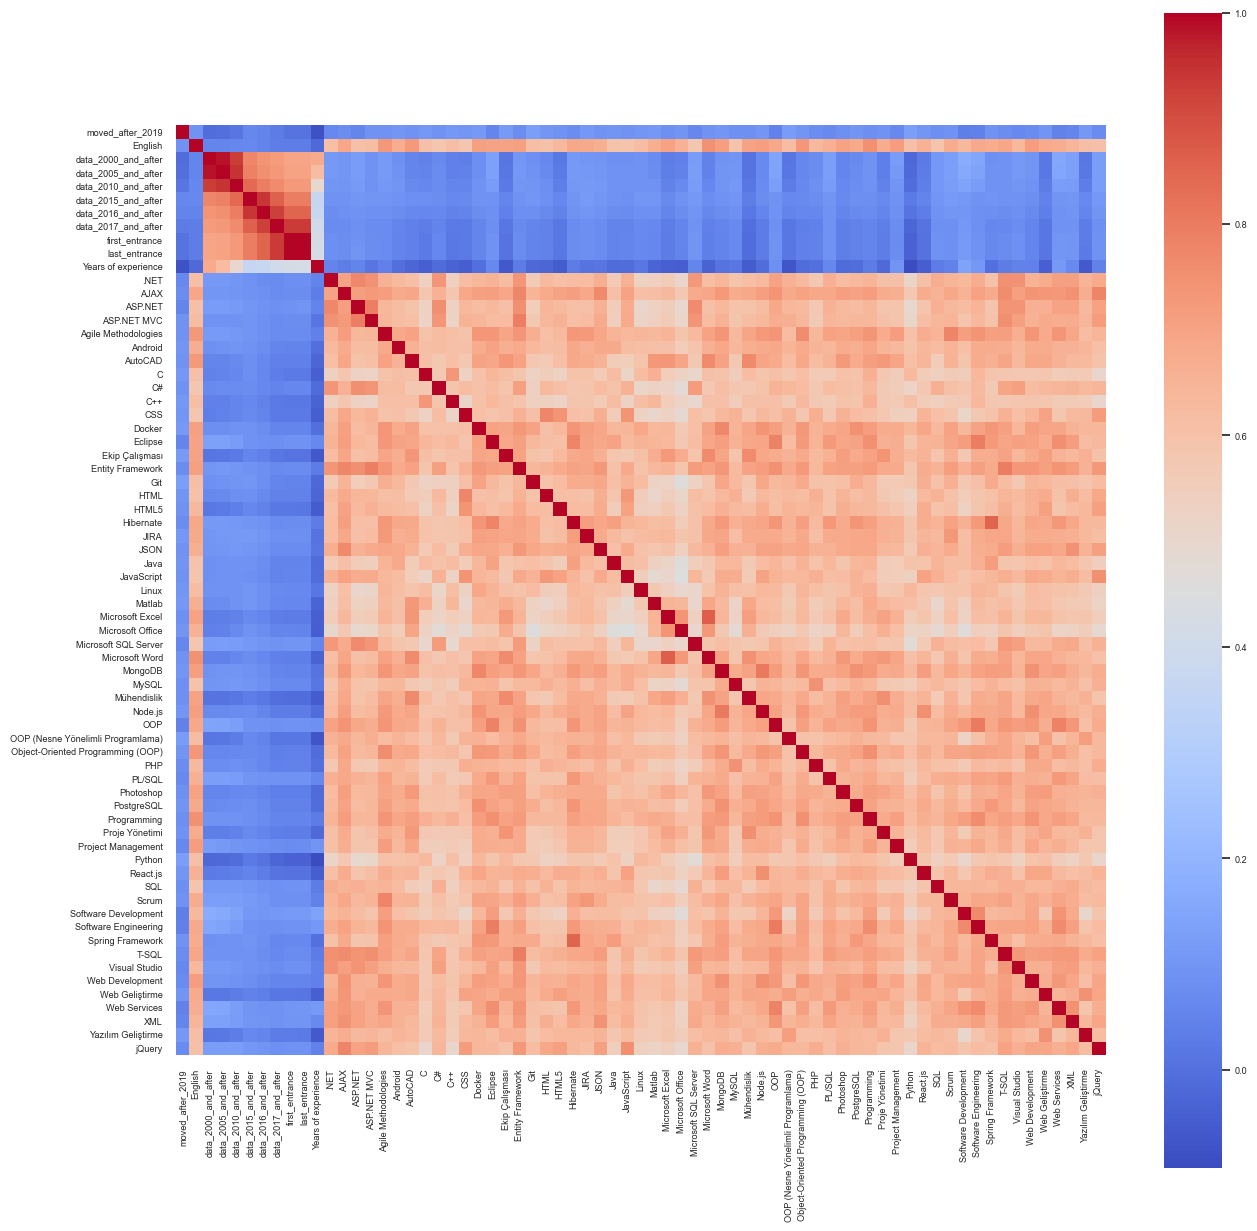

In [75]:
corr = df_train.corr()
sns.set(font_scale=0.6)
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap="coolwarm",square=True)
plt.show()

## <font color = "purple">Train and Test Side </font>
- Used StratifiedKFold to split dataset into train and test
- RandomForest Algorithm is used, since it is tree based, thought that will be suitable for this problem, and hyperparamters are tuned.

In [78]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix,RocCurveDisplay
from sklearn.preprocessing import scale,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier 

fold : 1
score : 0.7902817054774096
-----------------------------------------------------
fold : 2
score : 0.7890144815683253
-----------------------------------------------------
fold : 3
score : 0.797967269020494
-----------------------------------------------------
fold : 4
score : 0.7975531938821413
-----------------------------------------------------
fold : 5
score : 0.7254377791515083
-----------------------------------------------------
Score over 5-folds : 0.7800508858199757


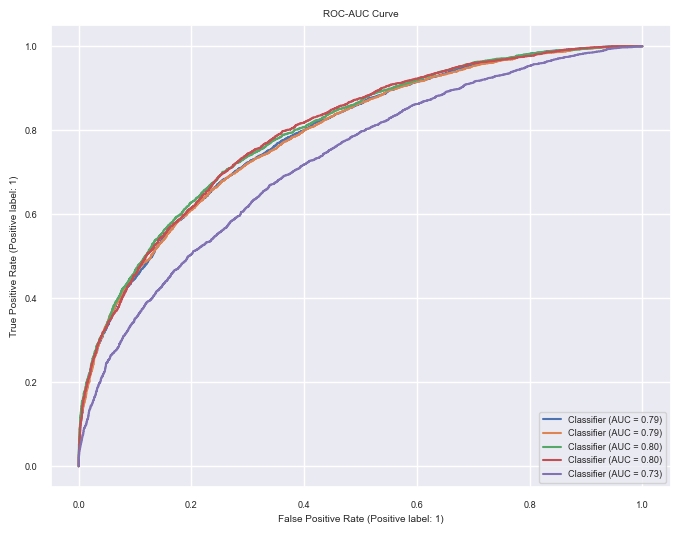

In [111]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('ROC-AUC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')


# split into X, Y
X = df_train.drop(['moved_after_2019'], axis=1).copy()
Y = df_train['moved_after_2019'].copy()
X_test = df_test.copy()

forest_cv_scores = list()
forest_importances = list()
forest_preds_test = list()

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, Y)):
    
    # split into train, valid
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    Y_train, Y_valid = Y.iloc[train_index], Y.iloc[valid_index]

    # model
    forest_model = RandomForestClassifier(n_estimators=300,max_depth=7,
                                          min_samples_split=5,
                                          min_samples_leaf=2,
                                          class_weight='balanced_subsample', 
                                          random_state=42)
    
    # train
    forest_model.fit(X_train, Y_train)

    # importances
    forest_importances.append(forest_model.feature_importances_)
    
    # validation
    lgb_pred_valid = lgb_md.predict_proba(X_valid)[:, 1]
    forest_cv_scores.append(roc_auc_score(Y_valid, lgb_pred_valid))
    RocCurveDisplay.from_predictions(Y_valid, lgb_pred_valid,  ax=ax)

    # test
    forest_pred_test = forest_model.predict_proba(X_test)[:, 1]
    forest_preds_test.append(forest_pred_test)
    

    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {forest_cv_scores[-1]}')
    print('-----------------------------------------------------')
# folds score
forest_cv_score = np.mean(forest_cv_scores)    
print(f'Score over 5-folds : {forest_cv_score}')

In [ ]:
predicted = final_randomForest_model.predict(df_test)
# train
submission.loc[:,"moved_after_2019"] = predicted
submission = submission.astype(int)
submission.to_csv("/kaggle/working/submission.csv",index=False)